===========Done!===============
===========Done!===============
===========Done!===============
===========Done!===============
===========Done!===============


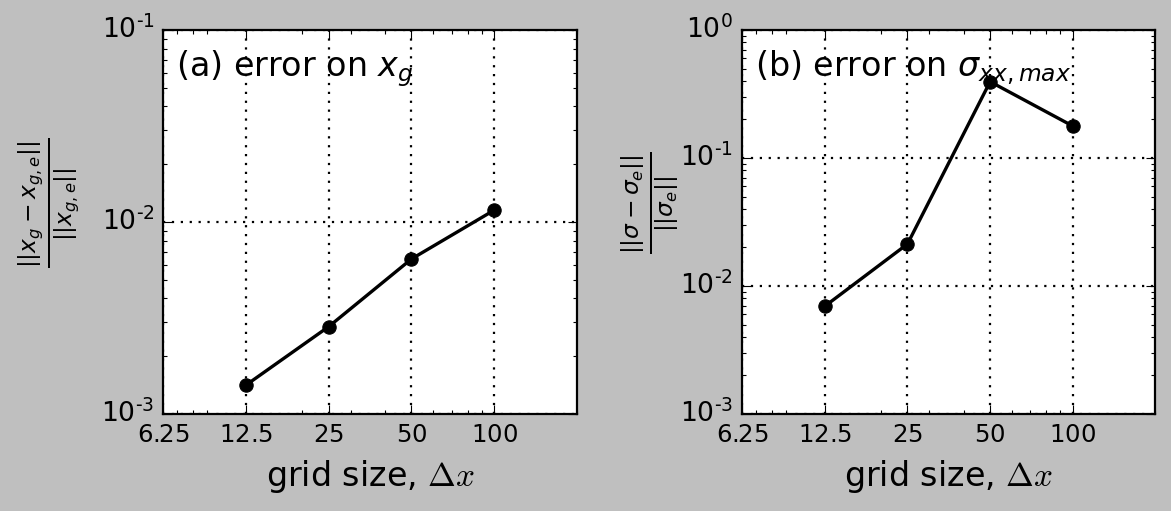

In [19]:
#======================= import essential libraries ===========================
import os
import math
import numpy as np
from tqdm import trange
from numpy import linalg as LA
import matplotlib.pyplot as plt

#======================= input parameters  ===========================
Hght = 500               # Height(m)
Lngth = 2e4              # Lngth(m)               
tol = 1e-3               # Tolerance(m)
T = 0.5*3.154e7/(12.0*30.0)  # solar tide period
sea_level = Hght*0.917   # sea level(m)
r_lake = 0.5e3           # lake redius
KIc = 1e5                # Ice fracture toughness
rho_w = 1e3              # water density (kg/m^3)
rho_i = 917              # ice density (kg/m^3)
g = 9.8 # m/s^2          # gravity (m/s^2)
pi=math.pi               # pi
basin_elev = 80.0        # basin_elevation (m)
depth_basin = 90.0 - basin_elev  # basin depth (m)
# plot settings
fs = 15
marker = 6               # MarkerType
ny=1e4                   # y grid resolution

#======================= read data ===========================
vfile = ['../results/convergence_tidal_response_U09ma_L20000_Slope1e_3_A3e_24_n3_0_mu0_30e9_deltap1e_13_deltav1e_18_tide1_00_C7e5_DX6',\
         '../results/convergence_tidal_response_U09ma_L20000_Slope1e_3_A3e_24_n3_0_mu0_30e9_deltap1e_13_deltav1e_18_tide1_00_C7e5_DX12',\
         '../results/convergence_tidal_response_U09ma_L20000_Slope1e_3_A3e_24_n3_0_mu0_30e9_deltap1e_13_deltav1e_18_tide1_00_C7e5_DX25',\
         '../results/convergence_tidal_response_U09ma_L20000_Slope1e_3_A3e_24_n3_0_mu0_30e9_deltap1e_13_deltav1e_18_tide1_00_C7_0e5_DX50',\
         '../results/convergence_tidal_response_U09ma_L20000_Slope1e_3_A3e_24_n3_0_mu0_30e9_deltap1e_13_deltav1e_18_tide1_00_C7e5_DX100']  

# correct the name of results
for file in vfile:
    path = file + "/line_plot_data"
    # print "name :", os.listdir(path)
    listName = os.listdir(path)
    for files in listName:
        if files[-4:]=='.txt':
            continue
        else:
            txtName = files + '.txt'
            os.rename(os.path.join(path,files), os.path.join(path,txtName))
    print ("===========Done!===============")

X = [] # list of xcoord
x_left = []
x_right = []
s_mean = []
h_mean = []
max_tension = []
t = np.loadtxt(vfile[0] + "/line_plot_data/t.txt", dtype='f', delimiter=' ')
for file in vfile:
    X.append(np.loadtxt(file + "/line_plot_data/X.txt", dtype='f', delimiter=' '))
    x_left.append(np.loadtxt(file + "/line_plot_data/x_left.txt", dtype='f', delimiter=' '))
    x_right.append(np.loadtxt(file + "/line_plot_data/x_right.txt", dtype='f', delimiter=' '))
    s_mean.append(np.loadtxt(file + "/line_plot_data/s_mean.txt", dtype='f', delimiter=' '))
    h_mean.append(np.loadtxt(file + "/line_plot_data/h_mean.txt", dtype='f', delimiter=' '))
    max_tension.append(np.loadtxt(file + "/max_tension.txt", dtype='f', delimiter=' '))
    
vdx = [12.5,25,50,100]
# =========================== figure =========================== 
# make the figure
fig,ax = plt.subplots(figsize=(8,3),nrows=1,ncols=2, constrained_layout=False)
plt.rcParams["figure.dpi"] = 300
plt.style.use('classic')
%config InlineBackend.figure_format = 'retina' # make high res plots for retina 5k displays

# range of the time
na = np.argmin(np.abs(t/T-10.0))               
nb = np.argmin(np.abs(t/T-11.0)) 

labels = ['(a) DX=6.25','(b) DX=12.5','(c) DX=25','(d) DX=50']
vcolor = ['k','y','b','r','g']
# ================================ (a) ===================================
ax = plt.subplot(121)
count =0
err = []
for i,file in enumerate(vfile):
    err.append(LA.norm(x_left[i][na:nb]-x_left[0][na:nb])/LA.norm(x_left[0][na:nb]))
    count += 1
err = np.array(err)
ax.plot(vdx,err[1:],'-',color=vcolor[0],linewidth = 1.5,marker='o')    

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim([1e-3,1e-1])
ax.set_ylabel(r'$\frac{\left \|| x_g-x_{g,e}\right \||}{\left \|| x_{g,e}\right \||}$',\
              math_fontfamily='dejavusans',fontsize = fs)
ax.set_xlim([6.25,200])
ax.set_xlabel(r'grid size, $\Delta x$',fontsize = fs)
ax.yaxis.set_label_coords(-.2, .55)

plt.xticks([6.25,12.5,25,50,100],[r'$6.25$',r'$12.5$',r'$25$',r'$50$',r'$100$'],fontsize=fs-4, math_fontfamily='dejavusans')
# lgd = ax.legend(loc="upper right",fontsize=fs-4)
ax.grid(True,linewidth=1)
ax.annotate('(a) error on $x_g$',xy=(0.03,0.88),xycoords='axes fraction',fontsize=fs, math_fontfamily='dejavusans')

# ================================ (b) ===================================
ax = plt.subplot(122)
count =0
err = []
for i,file in enumerate(vfile):
    # get upper and lower surface profile
    kind='linear'
    err.append(LA.norm(max_tension[i][na:nb]-max_tension[0][na:nb])/LA.norm(max_tension[0][na:nb]))
    count += 1
err = np.array(err)
ax.plot(vdx,err[1:],'-',color=vcolor[0],linewidth = 1.5,marker='o')    

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\frac{\left \|| \sigma-\sigma_{e}\right \||}{\left \|| \sigma_{e}\right \||}$',\
              math_fontfamily='dejavusans',fontsize = fs)
ax.set_xlim([6.25,200])
ax.yaxis.set_label_coords(-.15, .55)

ax.set_xlabel(r'grid size, $\Delta x$',fontsize = fs)
plt.xticks([6.25,12.5,25,50,100],[r'$6.25$',r'$12.5$',r'$25$',r'$50$',r'$100$'],fontsize=fs-4, math_fontfamily='dejavusans')
ax.grid(True,linewidth=1)
ax.annotate('(b) error on $\sigma_{xx,max}$',xy=(0.03,0.88),xycoords='axes fraction',fontsize=fs, math_fontfamily='dejavusans')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.40, hspace=0.2)

# plt.savefig('./figures/figure_8.tiff',bbox_inches='tight',dpi=600)